# Gradient Descent Demo — Linear Regression

This notebook shows **gradient descent** finding a best-fit line for a small dataset.

### Simple idea:
- Imagine you're on a hill in the dark. You take **small steps downhill** until you reach the bottom.
- Here, the "hill" is the error (Mean Squared Error). The "bottom" is the smallest error.
- We update the slope `m` and intercept `b` step by step to go **downhill**.


## 1) Data
We'll reuse a simple dataset (hours studied vs exam score).

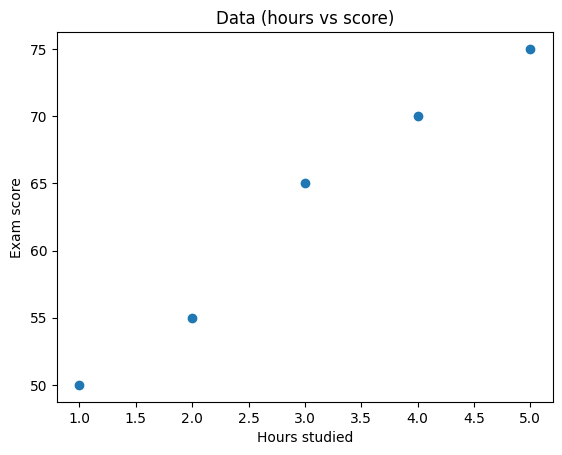

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([50, 55, 65, 70, 75], dtype=float)

plt.figure()
plt.scatter(X, y)
plt.xlabel('Hours studied')
plt.ylabel('Exam score')
plt.title('Data (hours vs score)')
plt.show()

## 2) Gradient Descent Functions
We'll implement the update rules for `m` and `b`.
Computes the slope (dm) and intercept (db) gradients.
Gradients show the direction of steepest descent on the cost function.
Negative sign ensures we step downhill.

In [3]:
def compute_gradients(X, y, m, b):
    X = _to_1d(X); y = _to_1d(y)
    y_pred = m * X + b
    error = y - y_pred
    n = X.size
    dm = -(2/n) * np.sum(X * error)   # slope gradient
    db = -(2/n) * np.sum(error)       # intercept gradient
    return dm, db

## Calculate the MSE
Mean Squared Error (MSE): The cost function we are minimising.
Measures the average squared difference between predictions and actual data.

In [4]:
def mse(X, y, m, b):
    X = _to_1d(X); y = _to_1d(y)
    return np.mean((y - (m*X + b))**2)


## 3) Run Gradient Descent
We start with guesses for `m` and `b`, then take many small steps. Try changing `alpha` (learning rate) and `epochs`.

## 🔑 Epochs (Quick Summary)

- **Epoch** = one full pass through the training data.  
- Multiple epochs → model sees the same data many times, improving learning.  
- **Too few** = underfitting, **too many** = overfitting.  

👉 Think of going through a flashcard deck once = 1 epoch; repeating 10 times = 10 epochs.


Final slope (m): 6.8628
Final intercept (b): 42.1902


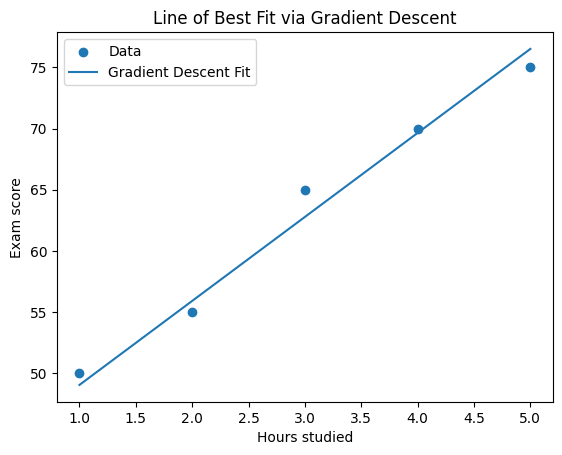

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Data ----------
X = np.array([1, 2, 3, 4, 5], dtype=float)         # hours studied
y = np.array([50, 55, 65, 70, 75], dtype=float)    # exam scores

# ---------- Helpers (robust to X as 1D or 2D) ----------
def _to_1d(a):
    """Ensure a 1D float array."""
    a = np.asarray(a, dtype=float)
    return a.ravel()

def compute_gradients(X, y, m, b):
    X = _to_1d(X); y = _to_1d(y)
    y_pred = m * X + b
    error = y - y_pred
    n = X.size
    dm = -(2/n) * np.sum(X * error)
    db = -(2/n) * np.sum(error)
    return dm, db

def mse(X, y, m, b):
    X = _to_1d(X); y = _to_1d(y)
    return np.mean((y - (m*X + b))**2)

# ---------- Gradient Descent ----------
alpha = 0.01   # learning rate (step size)
epochs = 1000  # number of steps
m, b = 0.0, 0.0

history = {'m': [], 'b': [], 'loss': []}

for _ in range(epochs):
    dm, db = compute_gradients(X, y, m, b)
    m -= alpha * dm
    b -= alpha * db
    history['m'].append(m)
    history['b'].append(b)
    history['loss'].append(mse(X, y, m, b))

print('Final slope (m):', round(m, 4))
print('Final intercept (b):', round(b, 4))

# ---------- Visualise the fit ----------
plt.figure()
plt.scatter(X, y, label='Data')
x_line = np.linspace(X.min(), X.max(), 100)
plt.plot(x_line, m*x_line + b, label='Gradient Descent Fit')
plt.xlabel('Hours studied'); plt.ylabel('Exam score')
plt.title('Line of Best Fit via Gradient Descent'); plt.legend(); plt.show()




## 4) Loss Curve (Are we going downhill?)
If gradient descent is working, the loss (MSE) should go down over time.

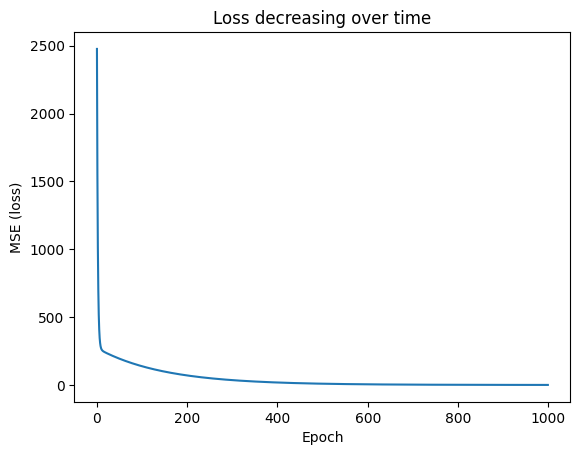

In [7]:
# ---------- Visualise the loss decreasing ----------
plt.figure()
plt.plot(history['loss'])
plt.xlabel('Epoch'); plt.ylabel('MSE (loss)')
plt.title('Loss decreasing over time'); plt.show()

## 5) See the Line Improve (Early → Middle → Final)
We plot the fitted line at three moments in training. One plot per cell.

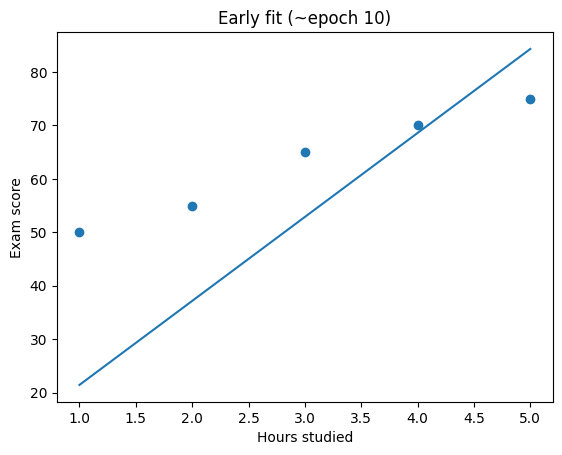

In [5]:
def line_y(m, b, X):
    return m*X + b

x_line = np.linspace(X.min(), X.max(), 100)

# Early training (epoch ~ 10)
m10, b10 = history['m'][9], history['b'][9]
plt.figure()
plt.scatter(X, y)
plt.plot(x_line, line_y(m10, b10, x_line))
plt.xlabel('Hours studied')
plt.ylabel('Exam score')
plt.title('Early fit (~epoch 10)')
plt.show()

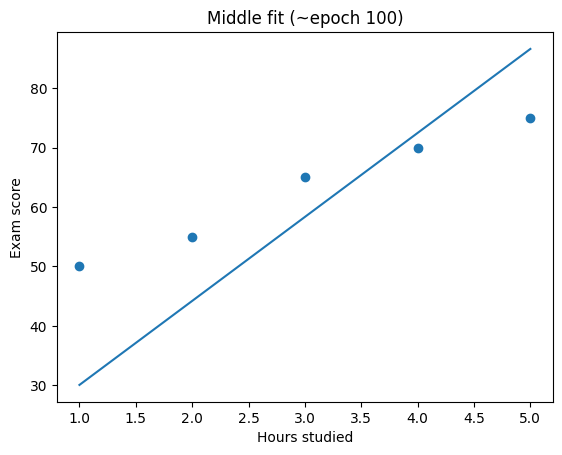

In [6]:
# Middle training (epoch ~ 100)
m100, b100 = history['m'][99], history['b'][99]
plt.figure()
plt.scatter(X, y)
plt.plot(x_line, line_y(m100, b100, x_line))
plt.xlabel('Hours studied')
plt.ylabel('Exam score')
plt.title('Middle fit (~epoch 100)')
plt.show()

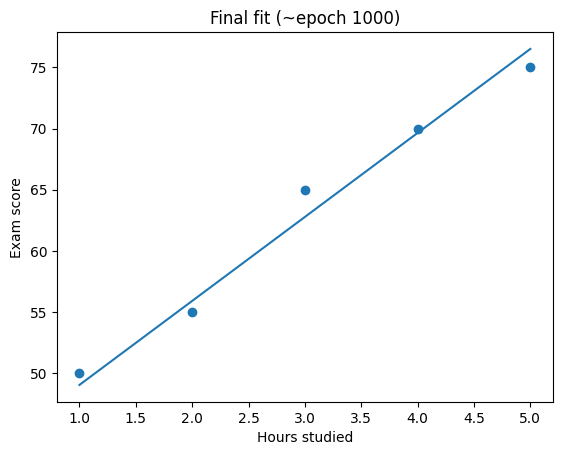

In [7]:
# Final training (epoch ~ 1000)
mF, bF = history['m'][-1], history['b'][-1]
plt.figure()
plt.scatter(X, y)
plt.plot(x_line, line_y(mF, bF, x_line))
plt.xlabel('Hours studied')
plt.ylabel('Exam score')
plt.title('Final fit (~epoch 1000)')
plt.show()

## 6) Compare to scikit-learn's LinearRegression (closed-form)
This shows the slope & intercept found by the **Normal Equation** method used by scikit-learn (no gradient descent).

sklearn slope: 6.500000000000001
sklearn intercept: 43.5


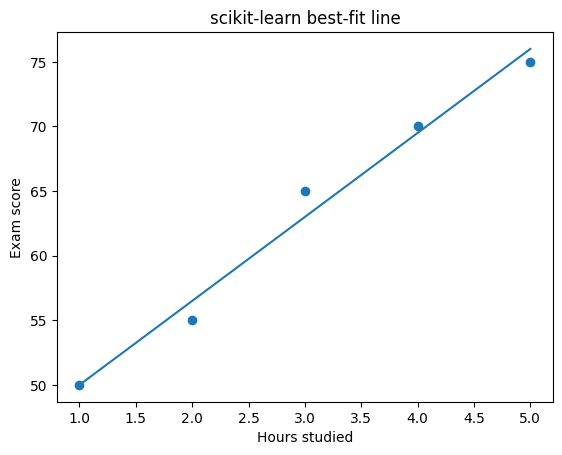

In [8]:
from sklearn.linear_model import LinearRegression
X_2d = X.reshape(-1, 1)
sk = LinearRegression().fit(X_2d, y)
print('sklearn slope:', sk.coef_[0])
print('sklearn intercept:', sk.intercept_)

plt.figure()
plt.scatter(X, y)
plt.plot(x_line, sk.predict(x_line.reshape(-1,1)))
plt.xlabel('Hours studied')
plt.ylabel('Exam score')
plt.title('scikit-learn best-fit line')
plt.show()

## 7) Try it yourself
- Change `alpha` and see if the loss still goes down. Too big can make it diverge.
- Change `epochs` to see how many steps you need.
- Add noise to `y` and see how the fit changes.


__9. Play the [Gradient Descent Game](https://www.i-am.ai/gradient-descent.html), and read about local and global minimums.__